# Life-Cycle Labor Supply of Couples with Children

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Dual-Earner Model with Children

In [2]:
# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

In [3]:
%time model.solve()

t: 9
t: 8
t: 7


/Users/joshuaclyne/Library/Mobile Documents/com~apple~CloudDocs/2024/Welfarestate seminar/Welfare-State-Seminar-Paper/Simple unitary model with assets/DynHouseholdLaborModel.py:383: RuntimeWarning: overflow encountered in scalar power
  util_hours1 = rho_1 * (hours1)**(1.0 + par.gamma) / (1.0 + par.gamma)
/Users/joshuaclyne/Library/Mobile Documents/com~apple~CloudDocs/2024/Welfarestate seminar/Welfare-State-Seminar-Paper/Simple unitary model with assets/DynHouseholdLaborModel.py:384: RuntimeWarning: overflow encountered in scalar power
  util_hours2 = rho_2 * (hours2)**(1.0 + par.gamma) / (1.0 + par.gamma)
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


t: 6


/Users/joshuaclyne/Library/Mobile Documents/com~apple~CloudDocs/2024/Welfarestate seminar/Welfare-State-Seminar-Paper/Simple unitary model with assets/DynHouseholdLaborModel.py:229: RuntimeWarning: invalid value encountered in scalar add
  return util + par.beta * EV_next
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:489: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:57: RuntimeWarning: invalid value encountered in subtract
  upper_dist = ub - x0
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:575: RuntimeWarning: invalid value encountered in scalar subtract
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:598: RuntimeWarning: overflow encountered in divide
  J_transposed[i] = df / dx


t: 5
t: 4
t: 3
t: 2
t: 1
t: 0
CPU times: user 24min 49s, sys: 5.51 s, total: 24min 54s
Wall time: 45min 10s


# Simulate child-related transfers reforms

In [4]:
model.simulate()

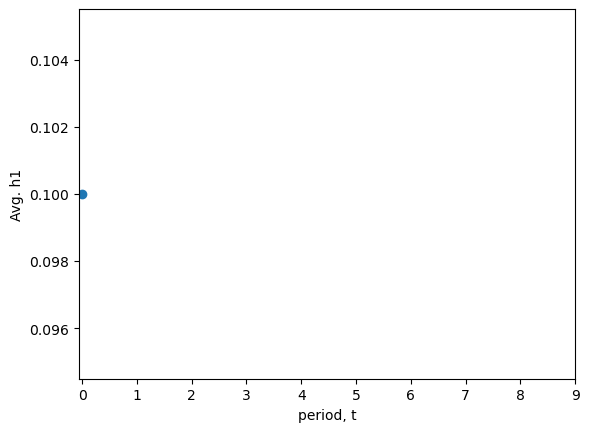

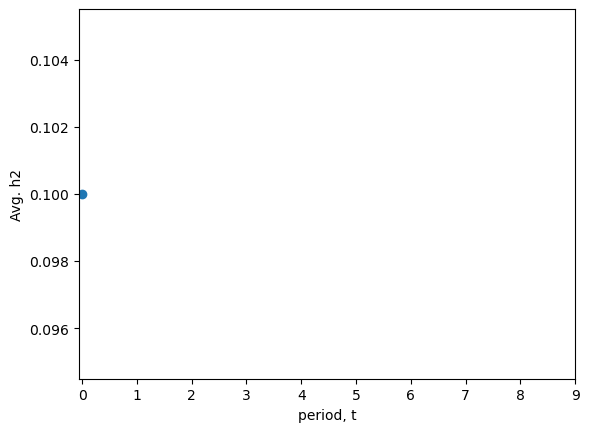

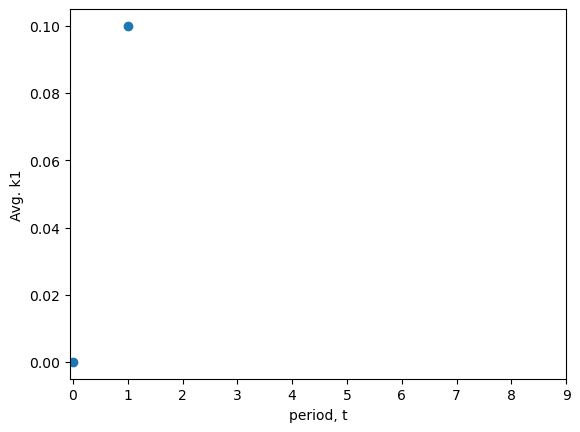

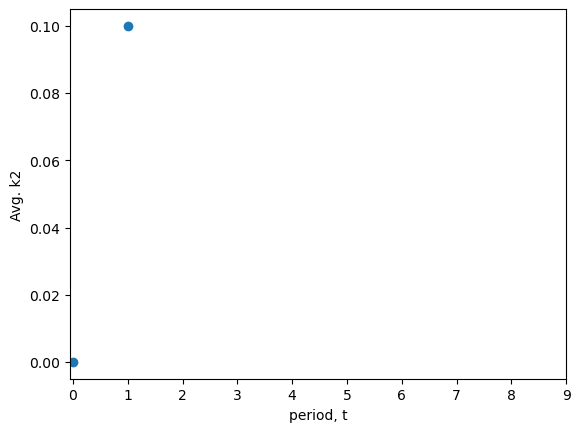

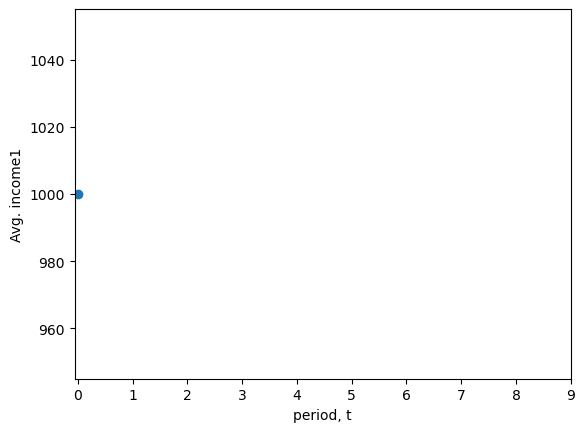

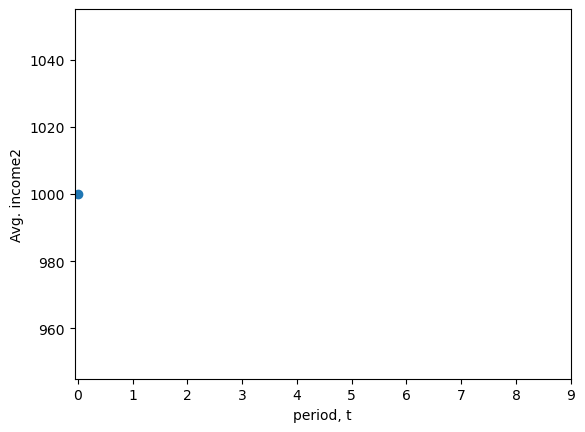

In [5]:
# plot behavior
for var in ('h1','h2','k1','k2','income1','income2'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(sim,var),axis=0),label='Simulated')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));

In [6]:
model_no_transfers = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':0.0, 'cond_high': 0.0})
model_uncon_uni = DynHouseholdLaborModelClass(par={'uncon_uni': 1000.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':0.0, 'cond_high': 0.0})
model_uncon_means = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 1000.0, 'means_slope': 25.0, 'cond':0.0, 'cond_high': 0.0})
model_con_uni = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':1000.0, 'cond_high': 0.0})
model_con_means = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':1000.0, 'cond_high': -500.0})

In [7]:
model_no_transfers.solve()
model_no_transfers.simulate()

model_uncon_uni.solve()
model_uncon_uni.simulate()

model_uncon_means.solve()
model_uncon_means.simulate()

model_con_uni.solve()
model_con_uni.simulate()

model_con_means.solve()
model_con_means.simulate()


t: 9
t: 8


KeyboardInterrupt: 

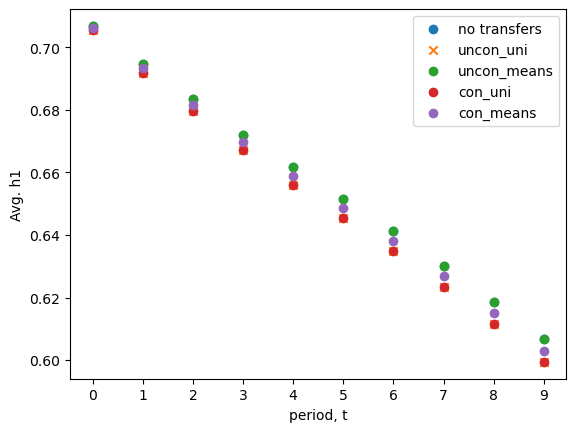

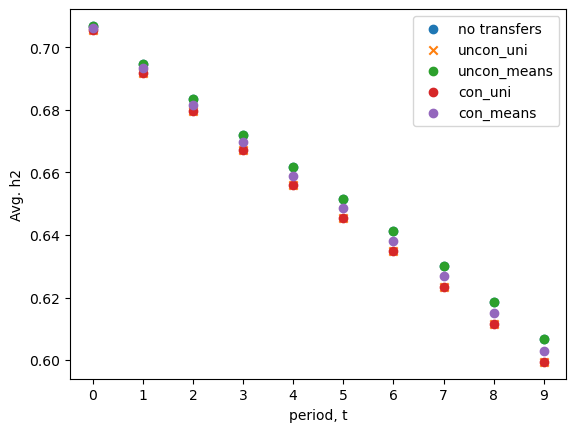

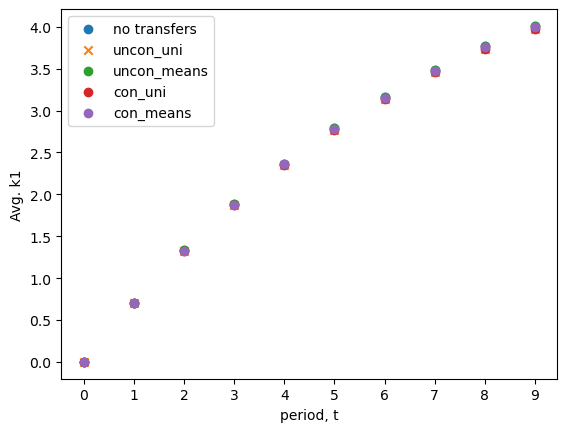

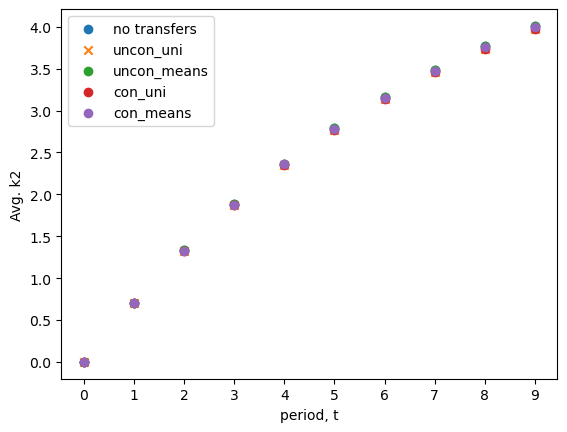

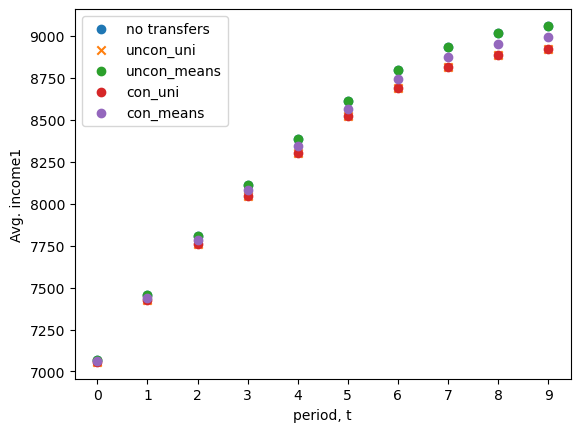

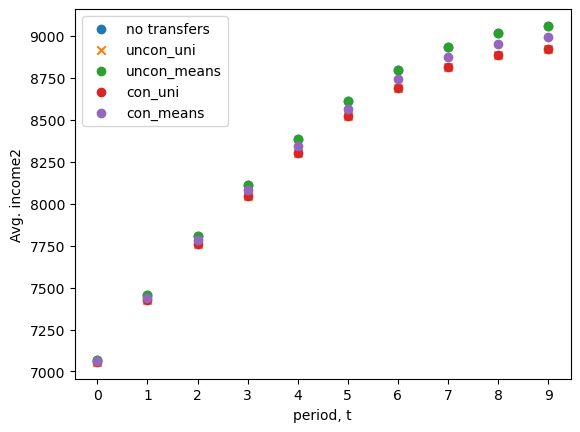

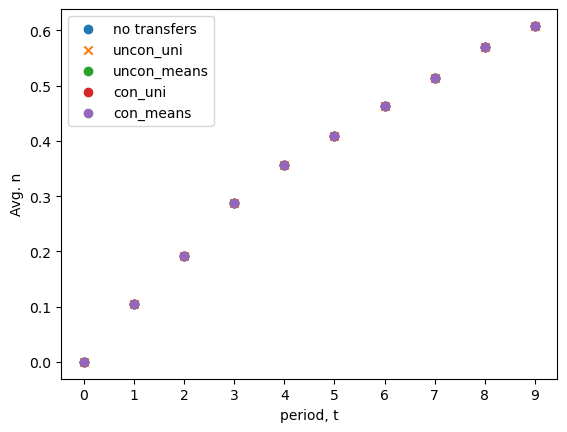

In [ ]:


# plot behavior
for var in ('h1','h2','k1','k2','income1','income2', 'n'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(model_no_transfers.sim,var),axis=0),label='no transfers')
    ax.scatter(range(par.simT),np.mean(getattr(model_uncon_uni.sim,var),axis=0),label='uncon_uni', marker = 'x')
    ax.scatter(range(par.simT),np.mean(getattr(model_uncon_means.sim,var),axis=0),label='uncon_means')
    ax.scatter(range(par.simT),np.mean(getattr(model_con_uni.sim,var),axis=0),label='con_uni')
    ax.scatter(range(par.simT),np.mean(getattr(model_con_means.sim,var),axis=0),label='con_means')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));
    ax.legend();